In [1]:
import json
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
mainfile = "result_2023_6_8.json"

In [3]:
maindata = []
with open(mainfile, 'r') as f:
  for entry in f:
      oneEntry = json.loads(entry)
      maindata.append(oneEntry)

In [4]:
filtered_data = []
for d in maindata: 
  if d.get('report') != None: #not empty
    if d.get('report').get('user_id') != None: 
      filtered_data.append(d)

In [5]:
type(maindata)

list

In [6]:
print(len(maindata),
len(filtered_data))

688185 533229


In [7]:
empty_data = []
for d in maindata: 
    if d.get('report') != None: 
        if d.get('report').get('user_id') == None:
            empty_data.append(d)

In [8]:
len(empty_data)

139405

In [9]:
len(empty_data)/len(maindata)

0.2025690766291041

In [10]:
len(filtered_data)

533229

In [11]:
filtered_data[2]

{'_id': {'$oid': '64471fbb174dab7e4b463c1e'},
 'report': {'user_id': 'd1wgiodc53k',
  'school_district': 'Hamilton',
  'grade': '12',
  'request_method': 'GET',
  'timestamp': '2023-04-25T00:33:00.951Z',
  'leak_url': None,
  'initiator_domain': None,
  'url_leak_type': None,
  'body_leak_type': [],
  'tracker_info': {'action': 'ignore',
   'reason': 'first party',
   'firstParty': True,
   'redirectUrl': False,
   'matchedRule': None,
   'matchedRuleException': False,
   'tracker': {'domain': 'gstatic.com',
    'owner': {'name': 'Google LLC',
     'displayName': 'Google',
     'privacyPolicy': 'https://policies.google.com/privacy?hl=en&gl=us',
     'url': 'http://google.com'},
    'prevalence': 0.502,
    'fingerprinting': 2,
    'cookies': 0.00112,
    'categories': ['Content Delivery', 'Embedded Content'],
    'default': 'ignore',
    'rules': [{'rule': {}, 'fingerprinting': 3, 'cookies': 0},
     {'rule': {}, 'fingerprinting': 3, 'cookies': 0},
     {'rule': {}, 'fingerprinting': 0

In [12]:
'''example'''
print(filtered_data[0]['report']['tracker_info']['tracker']['owner']['url'])

http://google.com


In [13]:
#get all urls in a list
urls = []
for d in filtered_data: 
    rep = d['report']
    if rep.get('tracker_info') != None: #some reports do not have tracker info
        if rep['tracker_info'].get('tracker').get('owner').get('url') != None: #all reports with tracker info, have the following
            urls.append(d['report']['tracker_info']['tracker']['owner']['url'])
print(len(urls))

288202


In [14]:
print(urls[0:10])

['http://google.com', 'http://google.com', 'http://google.com', 'http://google.com', 'http://google.com', 'http://google.com', 'http://google.com', 'http://google.com', 'http://google.com', 'http://google.com']


In [15]:
len(urls)/len(filtered_data)

0.5404844822768454

In [16]:
print(len(set(urls)))

76


In [17]:
def simple_produce_count(list):
    count_d = {}
    for i in list: 
        if i in count_d: 
            a = count_d.get(i)
            count_d[i] = a + 1
        else: 
            count_d[i] = 1
            
    return dict(sorted(count_d.items(), key=lambda x:x[1], reverse = True))

In [18]:
type(simple_produce_count(urls))

dict

In [19]:
#counting how many times a url appears in the reports, and sorting in order
sorted_count_urls = produce_count_dict(urls)
sorted_count_urls

NameError: name 'produce_count_dict' is not defined

interesting websites from a bird eye view: 
- a few web add related websites (eg. tradedesk, smartadserver, adyoulike, adform, gumgum)
- paypal has 13 findings --> google, amazon also have credit card details

also, interesting is to look at the top ones with obscure websites eg. 
 ('http://pubmatic.com', 896), --> media company "digital marketing" 
 ('http://sharethrough.com', 301), --> "human centric programmatic advertising" 
 
I guess this makes sense that these are the ones picked up, as they do collect user data

## What the data is

In [15]:
example_report = filtered_data[3]['report']
example_report

{'user_id': 'd1wgiodc53k',
 'school_district': 'Hamilton',
 'grade': '12',
 'request_method': 'GET',
 'timestamp': '2023-04-25T00:33:00.951Z',
 'leak_url': None,
 'initiator_domain': None,
 'url_leak_type': None,
 'body_leak_type': [],
 'tracker_info': {'action': 'ignore',
  'reason': 'first party',
  'firstParty': True,
  'redirectUrl': False,
  'matchedRule': None,
  'matchedRuleException': False,
  'tracker': {'domain': 'gstatic.com',
   'owner': {'name': 'Google LLC',
    'displayName': 'Google',
    'privacyPolicy': 'https://policies.google.com/privacy?hl=en&gl=us',
    'url': 'http://google.com'},
   'prevalence': 0.502,
   'fingerprinting': 2,
   'cookies': 0.00112,
   'categories': ['Content Delivery', 'Embedded Content'],
   'default': 'ignore',
   'rules': [{'rule': {}, 'fingerprinting': 3, 'cookies': 0},
    {'rule': {}, 'fingerprinting': 3, 'cookies': 0},
    {'rule': {}, 'fingerprinting': 0, 'cookies': 0, 'comment': 'pixel'},
    {'rule': {}, 'fingerprinting': 0, 'cookies'

In [38]:
#this is the initiatior website + then link the tracker website
#merge at a global level, then GROUP by user
#connect this to the tracker 
#if the tracker website has an empty intitatior website, then present it and display the timestamp
a = set()
for i in filtered_data: 
    rep = i['report']
    if rep['initiator_domain'] != None: 
        a.add(rep['initiator_domain'])
print(a)

{'https://uchicago.zoom.us/', 'https://player.vimeo.com/', 'https://calendly.com/', 'https://accounts.youtube.com/', 'https://www.citationmachine.net/', 'https://www.nytimes.com/', 'https://eds.p.ebscohost.com/', 'https://platform.twitter.com/', 'https://www.duolingo.com/', 'https://mail.google.com/', 'https://widgets.ebscohost.com/', 'https://sdc-evs.ebscohost.com/', 'https://create.microsoft.com/', 'https://service.force.com/', 'https://appsitemsuggest-pa.clients6.google.com/', 'https://uchicagossecretplaces.wordpress.com/', 'https://scholar.google.com/', 'https://c.paypal.com/', 'https://www.google.com/', 'https://contacts.google.com/', 'https://lightroom.adobe.com/', 'https://keep-pa.clients6.google.com/', 'https://support.google.com/', 'https://tv.apple.com/', 'https://search.ebscohost.com/', 'https://www.facebook.com/', 'https://accounts.google.com/', 'https://ogs.google.com/', 'https://eds.s.ebscohost.com/', 'https://outlook.office.com/', 'https://drive.google.com/', 'https://cl

In [18]:
#what is leak_url and what is url_leak_type
leak_type = []

for i in filtered_data: 
    if i.get('report') != None: 
        leak_type.append(i['report']['url_leak_type'])
        
print(len(leak_type))

533229


In [19]:
nonempty_leak_type = []
for i in leak_type: 
    if i != None: 
        nonempty_leak_type.append(i)

In [20]:
print(len(nonempty_leak_type), nonempty_leak_type[1], type(nonempty_leak_type[1]))

247236 ['lastname', 'email'] <class 'list'>


In [21]:
def return_unique(l: list): 
    '''
    A function that does the same thing as a set(), but for unhashable types
    '''
    a = set()
    
    [[a.add(field) for field in item] for item in l]

    return a

In [22]:
return_unique(nonempty_leak_type)

{'email', 'firstname', 'id', 'lastname', 'phone', 'preferredname'}

In [25]:
test_1 = list(set(tuple(sorted(sub)) for sub in nonempty_leak_type))
test_1

[('email', 'lastname', 'preferredname'),
 ('email', 'firstname', 'preferredname'),
 ('email',),
 ('phone', 'preferredname'),
 ('email', 'id', 'lastname'),
 ('firstname', 'lastname', 'preferredname'),
 ('preferredname',),
 ('lastname',),
 ('id', 'lastname'),
 ('lastname', 'preferredname'),
 ('id',),
 ('firstname',),
 ('firstname', 'lastname'),
 ('email', 'lastname'),
 ('firstname', 'preferredname')]

In [23]:
def produce_count_dict(l):
    d_keys = list(set(tuple(sorted(sub)) for sub in l))
    count_d = {field: None for field in d_keys}
    for i in l: 
        if sorted(i) in count_d: 
            a = count_d.get(j)
            count_d[j] = a + 1
        else: 
            count_d[j] = 1
    #sorting data
    sorted_count = sorted(count_d.items(), key=lambda x:x[1], reverse = True)

    return count_d

In [24]:
filtered_data[10002]

{'_id': {'$oid': '64472f93d9e77d75c882fc6e'},
 'report': {'user_id': '2wpdvj73oou',
  'school_district': 'Other',
  'grade': '6',
  'request_method': 'GET',
  'timestamp': '2023-04-25T01:40:35.458Z',
  'leak_url': None,
  'initiator_domain': None,
  'url_leak_type': None,
  'body_leak_type': [],
  'tracker_info': None}}

things to do next
- script to output a markdown/text file outputting the da
- potential graphs
- understanding trends (time series)
- other types of data to look at 
- especially under fb/google/etc

- create a started page for extension 
- then group by User

also, explain what one entry is
- does the order of the field counted matter? 
- should we open these tuples and sort by field itself, or as a packaged tuple

## connecting field types with company

In [25]:
final_count = {}

for i in filtered_data: 
    if i['report'].get('tracker_info') != None: #some reports do not have tracker info
        if i['report']['tracker_info'].get('tracker').get('owner').get('url') != None: #all reports w/ tracker info has the owner/url link
            #getting urls (which will be the keys)
            url = i['report']['tracker_info']['tracker']['owner']['url']
            #getting leak types (which will be the keys for the nested dict for each url)
            if i['report']['url_leak_type'] is None: 
                leak_type = "None"
            else: 
                leak_type = i['report']['url_leak_type']
                leak_type = tuple(sorted(leak_type)) #ADDING THE SORTED REMOVES FIELD DUPLICATES
                            
            if url in final_count: 
                #dic.get('b') == None: <-- another way to find 
                if leak_type in final_count[url]: 
                    final_count[url][leak_type] += 1
                else: 
                    final_count[url][leak_type] = 1
            else: 
                final_count[url] = {} #results in empty field dicts for some urls
                
len(final_count)

76

In [26]:
#FINAL COUNT IS --> each url's leak_type and count of leaks
final_count
final_count_copy = final_count.copy()

In [27]:
len(final_count_copy), len(final_count)

(76, 76)

ideal output: <br>

{ 'website.com': {<br>
&emsp;&emsp;    field_name_1: 23 <br>
&emsp;&emsp;    field_name_2: 34 <br>
&emsp;&emsp;    field_name_3: 12<br>
&emsp;&emsp;        }<br>
   'website2.com': {<br>
     &emsp;&emsp;  field_name_2: 124<br>
     &emsp;&emsp;  field_name_4: 81<br>
 &emsp;&emsp;    } <br>
}

In [40]:
#removing values with None, and removing dictionairies, 
#where the website is only an empty dictinoairy, ie. no field 
deleted_websites = []

for website in list(final_count_copy.keys()): 
    
    field_dict = final_count_copy[website]
    field_count_website = len(list(field_dict.keys())) #eg. {('lastname',): 3, 'None': 1} = 2
    
    if field_count_website ==0: 
        final_count_copy.pop(website)    
    elif "None" in final_count_copy[website]: 
        del final_count_copy[website]["None"]  

In [41]:
#original remains unchanged (shallow copy)
len(final_count_copy), len(final_count)

(35, 76)

In [42]:
final_count_copy

{'http://google.com': {('email', 'lastname'): 180,
  ('id',): 22,
  ('lastname',): 161619,
  ('preferredname',): 33,
  ('firstname', 'preferredname'): 415,
  ('firstname',): 410,
  ('firstname', 'lastname'): 9,
  ('id', 'lastname'): 297,
  ('firstname', 'lastname', 'preferredname'): 12706,
  ('lastname', 'preferredname'): 7,
  ('phone', 'preferredname'): 25,
  ('email', 'id', 'lastname'): 2},
 'http://heap.io': {('lastname',): 5},
 'http://cloudflare.com': {('lastname',): 17, ('preferredname',): 1},
 'http://twitter.com': {('lastname',): 2, ('preferredname',): 15},
 'http://intuit.com': {('lastname',): 8},
 'http://facebook.com': {('lastname',): 3048,
  ('id', 'lastname'): 9,
  ('preferredname',): 4},
 'http://newrelic.com': {('lastname',): 142},
 'http://microsoft.com': {('lastname',): 687,
  ('lastname', 'preferredname'): 2,
  ('id', 'lastname'): 1,
  ('email', 'lastname'): 1},
 'http://akamai.com': {('lastname',): 3},
 'http://amazon.com': {('lastname',): 866,
  ('id', 'lastname'): 

In [1]:
#making some graphs for final_count_copy 

#sort total amount of counts
website_counts = {}
for key, value in final_count_copy.items(): 
    website_counts[key] = 0
    for c in value.values(): 
        website_counts[key] += c

website_counts = dict(sorted(website_counts.items(), key=lambda x:x[1], reverse = True)[0:8])
website_counts#produces list 

NameError: name 'final_count_copy' is not defined

In [76]:
#DataFrame.from_dict
df1 = pd.DataFrame.from_dict(data = website_counts, orient = "index", columns = ["Count"])
df1

,Count
http://facebook.com,3061
http://amazon.com,878
http://microsoft.com,691
http://newrelic.com,142
http://adobe.com,121
http://pubmatic.com,77
http://comscore.com,52


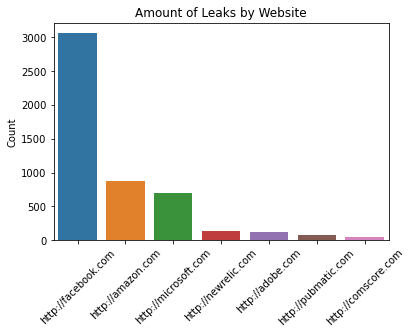

In [79]:
#sns.barplot(data=df, x="island", y="body_mass_g")
barplot1 = sns.barplot(data = df1, x = df1.index.values, y = 'Log Count').set(title="Amount of Leaks by Website")
plt.xticks(rotation = 45)
plt.show()
#TO DO: use a log scale --> plt.yscale('log') --> rewrite the columns 

In [59]:
final_count_copy
#full_df = DataFrame.from_dict(data = website_counts, orient = "index", columns = ["Count"])

{'http://google.com': {('email', 'lastname'): 180,
  ('id',): 22,
  ('lastname',): 161619,
  ('preferredname',): 33,
  ('firstname', 'preferredname'): 415,
  ('firstname',): 410,
  ('firstname', 'lastname'): 9,
  ('id', 'lastname'): 297,
  ('firstname', 'lastname', 'preferredname'): 12706,
  ('lastname', 'preferredname'): 7,
  ('phone', 'preferredname'): 25,
  ('email', 'id', 'lastname'): 2},
 'http://heap.io': {('lastname',): 5},
 'http://cloudflare.com': {('lastname',): 17, ('preferredname',): 1},
 'http://twitter.com': {('lastname',): 2, ('preferredname',): 15},
 'http://intuit.com': {('lastname',): 8},
 'http://facebook.com': {('lastname',): 3048,
  ('id', 'lastname'): 9,
  ('preferredname',): 4},
 'http://newrelic.com': {('lastname',): 142},
 'http://microsoft.com': {('lastname',): 687,
  ('lastname', 'preferredname'): 2,
  ('id', 'lastname'): 1,
  ('email', 'lastname'): 1},
 'http://akamai.com': {('lastname',): 3},
 'http://amazon.com': {('lastname',): 866,
  ('id', 'lastname'): 

Questions: 
- why are we picking up so many None types even after passing data thru filters?
- We should clean out the companies that have empty fields and 
        - 1) make a proportion measurement of empty to non empty
        - 2) add a filter hashtag to the companies by maybe doing easy webcrawl/nlp search and assigning if company is #media, #tech ... and then maybe categorize level of harm that the leaks are
- what prof. marshini said, about cateogiring by user instead of company
<br> the next steps are : <br>
### TODO: 
> get rid of "Nones" keys as a seperate output <br>
> also nicer outputs (*****in a text file -- f strings) w/ formatting <br>
- summary stats --> eg. total number of id leaks, percentages  <br>
- explain filtering + explain removing "Nones", and empty dictionairies

## sorting by user

In [31]:
#user id, and count how many times that user comes up
list_user = []
c = 0
for i in filtered_data: 
    a = i.get('report')['user_id']
    list_user.append(a)
    c += 1

In [32]:
len(list_user)

533229

In [33]:
simple_produce_count(list_user)

{'dknglbh1h3': 147075,
 '2wpdvj73oou': 120917,
 'zu7pjmkeoi': 99367,
 's4ni7dbb7y': 80690,
 '4485kqex0zs': 57416,
 'grr97iqp57r': 15253,
 '9tgpozqqg7d': 7127,
 'kix7pup4zh': 3358,
 'd1wgiodc53k': 724,
 '699mztw4z75': 494,
 'jktgjnvw8r': 180,
 'zoumk7kg3yq': 155,
 'l9duvpdz9m8': 119,
 '80yfsk3rrlc': 112,
 '4q68v2cg2pl': 90,
 'zwq78tx53ib': 74,
 '5tpckk3d14e': 53,
 'y9y0arr5kpm': 18,
 'p0fjtio4mr': 7}

In [34]:
#connecting user_id, and what types of fields are leaked and how many times they are found
dict_user_leak = {}

for i in filtered_data: 
    report = i['report']
    #getting user (which will be the keys)
    user = report["user_id"]
    #getting leak types (which will be the keys for the nested dict for each url)
    if report['url_leak_type'] == None: 
        leak_type = "None"
    else: 
        leak_type = report['url_leak_type']
        leak_type = tuple(sorted(leak_type)) #ADDING THE SORTED REMOVES FIELD DUPLICATES

    if user in dict_user_leak: 
        #dic.get('b') == None: <-- another way to find 
        if leak_type in dict_user_leak[user]: 
            dict_user_leak[user][leak_type] += 1
        else: 
            dict_user_leak[user][leak_type] = 1
    else: 
        dict_user_leak[user] = {} #results in empty field dicts for some urls

type(dict_user_leak)

dict

In [35]:
dict_user_leak
#TO-DO: 
#print out statistics -- by each user, percentages by user, then break down by leak type
#also by leak type break down by user (eg. heading: ["Emails"], how many leaks goes to each user)

#go thru extension and sort some data and go ask jake to send recent json (make sure user details matches websitesthat i go on)

#get date of first time the user is seen with field types + and last date of the user

{'d1wgiodc53k': {'None': 678,
  ('email', 'lastname'): 38,
  ('id',): 3,
  ('lastname',): 4},
 '2wpdvj73oou': {'None': 120916},
 'zwq78tx53ib': {'None': 69, ('email', 'lastname'): 4},
 'zoumk7kg3yq': {'None': 149, ('preferredname',): 5},
 '9tgpozqqg7d': {'None': 7109,
  ('email', 'lastname'): 6,
  ('email',): 10,
  ('lastname',): 1},
 's4ni7dbb7y': {'None': 80293,
  ('firstname', 'preferredname'): 391,
  ('email', 'firstname', 'preferredname'): 4,
  ('firstname', 'lastname', 'preferredname'): 1},
 '5tpckk3d14e': {('preferredname',): 51, 'None': 1},
 'grr97iqp57r': {'None': 15245,
  ('email', 'lastname'): 2,
  ('firstname', 'lastname', 'preferredname'): 5},
 'kix7pup4zh': {'None': 3353, ('preferredname',): 4},
 '699mztw4z75': {('firstname',): 461,
  'None': 23,
  ('firstname', 'lastname'): 9},
 'dknglbh1h3': {'None': 264,
  ('lastname',): 133373,
  ('id', 'lastname'): 712,
  ('firstname', 'lastname', 'preferredname'): 12725},
 'p0fjtio4mr': {'None': 6},
 '80yfsk3rrlc': {'None': 110, ('l

In [36]:
len(dict_user_leak.keys())

19

In [37]:
#outputing to text file to read data


 --> origin; leak; count; percent prevalance

#question: if we filter on if leak_url is not empty - is this dataset the same as filtered_data1

-- check and compare these two databases
-- len (size), make a set of each of them --> https://www.geeksforgeeks.org/python-set-difference/#